In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

#### Me genero 2 clusters para clasificar

In [2]:
from sklearn.datasets import make_blobs 

In [3]:
""" Creo set de datos X con n_samples (50) ejemplos 
pertenecientes a 2 clases.

Para eso hago uso de la función make_blobs de sklearn que
me genera 'grupos de puntos' isotropicos y gaussianos para 
tareas de clustering.
"""
X, Y = make_blobs(n_samples=50, centers=2, 
                  random_state=6) 

In [4]:
clf = svm.SVC(kernel='linear' , C = 1000)
clf.fit(X,Y);

In [5]:
#Me genero la lista de support vectors
clf.support_vectors_

array([[ 7.27059007, -4.84225716],
       [ 5.95313618, -6.82945967],
       [ 7.89359985, -7.41655113]])

### Grafico los datos y el hiperplano separador

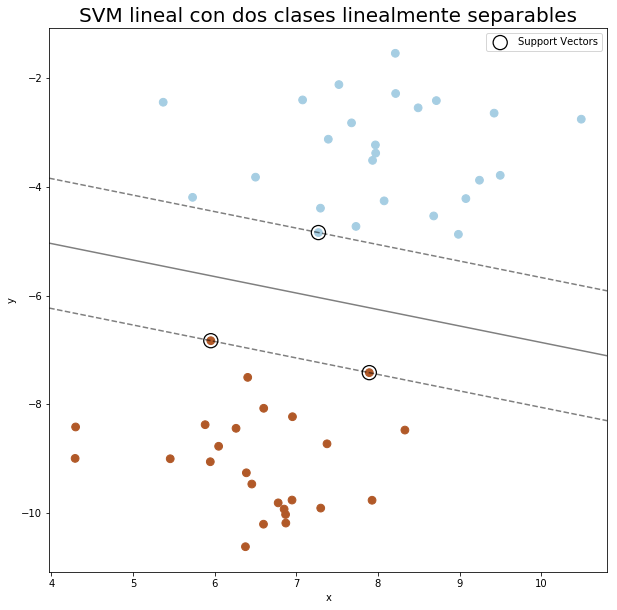

In [7]:
fig, ax = plt.subplots(figsize=(10,10))
#Dispersión de puntos de train
sca = plt.scatter(X[:, 0], X[:, 1], c=Y ,s=60 , cmap= plt.cm.Paired)

plt.xlabel("x")
plt.ylabel("y")
plt.title("SVM lineal con dos clases linealmente separables", size = 20)

ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# Grafico de el hiperplano separador y los hiperplanos H1 y H2
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])
# Le hago el contorno a los support vectors
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=200,
           linewidth=1.25, facecolors='none', edgecolors='k' , label = 'Support Vectors')
ax.legend()
plt.show()